# Lab 6 Tasks

In this notebook we will analyse a dataset from an Irish triathlon by using the Pandas library. In the dataset, each row represents an athlete, described by a number of different descriptive features:

- *Number:* The athlete's race bib number
- *Place:* The place in which the athlete finished the race
- *AgeCategory:* The athlete's age category (16-19, 20-29, 30-39, 40-49, or 50+)
- *Gender:* The gender that the athlete declared ('M' or 'F')
- *Province:* The Irish province where the athlete comes from (Leinster, Munster, Connacht, Ulster)
- *Swim:* The time taken for the swimming segment of the event (in seconds)
- *T1:* The time taken for the first transition of the event, from cycling to swimming (in seconds)
- *Cycle:* The time taken for the cycling segment of the event (in seconds)
- *T2:* The time taken for the swimming segment of the event, from swimming to running (in seconds)
- *Run:* The time taken for the running segment of the event (in seconds)

## Task 1 - Data Loading and Preparation

Use Python to download a file containing triathlon dataset in CSV format from the URL:

http://mlg.ucd.ie/modules/COMP30760/triathlon.csv

Load the dataset into a Pandas DataFrame, where the row index will be given by the athlete's bib number. Display the first 20 rows of the DataFrame.

In [2]:
import pandas as pd

#index_col makes number the index column
df = pd.read_csv("http://mlg.ucd.ie/modules/COMP30760/triathlon.csv", index_col="Number")
print(df.head(20))

        Place AgeCategory Gender  Province  Swim     T1   Cycle     T2     Run
Number                                                                        
1        11.0       16-19      M   Munster   518   64.0  2293.0   42.0  1446.0
2       129.0       20-29      M  Leinster  1102  124.0  2662.0   47.0  1723.0
3        35.0       20-29      M  Leinster   693  138.0  2472.0   42.0  1466.0
4       153.0       20-29      M   Munster   906  318.0  3002.0   62.0  1648.0
5        34.0       20-29      M  Connacht   566  131.0  2518.0   65.0  1522.0
6       131.0       20-29      M  Connacht   940  202.0  3083.0   63.0  1381.0
7       169.0       20-29      M  Leinster  1118  366.0  3114.0  127.0  1674.0
8        95.0       20-29      M  Leinster  1002  102.0  2449.0   59.0  1756.0
9        97.0       20-29      M    Ulster   735  213.0  2701.0   66.0  1655.0
10      150.0       20-29      M  Leinster   930  196.0  2976.0   66.0  1700.0
11       49.0       20-29      M  Leinster   827  22

The dataset might contain missing values. For instance, some athletes may have registered for the race for never actually. Other athletes might have started the race, but not completed all segments of the triathlon.

From the DataFrame, identify the number of missing values in each column. Then remove any rows which contain missing values (i.e. athletes who did not fullly complete the race). How many rows are remaining?

In [3]:
df.isna().sum()

print("Data contains %d rows" % len(df))

df = df.dropna()

print("Data contains %d rows" % len(df))


Data contains 188 rows
Data contains 182 rows


Add a new column to the DataFrame, called *Finish*, which is the total time taken for the race for each athlete (i.e. Swim + T1 + Cycle + T2 + Run).

In [4]:
df["Finish"] = df["Swim"] + df["T1"] + df["Cycle"] + df["T2"] + df["Run"]
print(df)

        Place AgeCategory Gender  Province  Swim     T1   Cycle    T2     Run  \
Number                                                                          
1        11.0       16-19      M   Munster   518   64.0  2293.0  42.0  1446.0   
2       129.0       20-29      M  Leinster  1102  124.0  2662.0  47.0  1723.0   
3        35.0       20-29      M  Leinster   693  138.0  2472.0  42.0  1466.0   
4       153.0       20-29      M   Munster   906  318.0  3002.0  62.0  1648.0   
5        34.0       20-29      M  Connacht   566  131.0  2518.0  65.0  1522.0   
...       ...         ...    ...       ...   ...    ...     ...   ...     ...   
184     143.0       30-39      F  Leinster   778  186.0  2932.0  96.0  1818.0   
185     178.0       30-39      M   Munster  1804  247.0  2720.0  99.0  1735.0   
186      42.0       30-39      M  Leinster   645  157.0  2540.0  75.0  1476.0   
187      68.0       40-49      F  Leinster   864  164.0  2632.0  61.0  1417.0   
188     120.0       20-29   

To verify the step above, sort the DataFrame, based on the *Finish* time, fastest to slowest. Display the top 10 fastest athletes overall:

In [5]:
df.sort_values(by="Finish").head(10)

,Place,AgeCategory,Gender,Province,Swim,T1,Cycle,T2,Run,Finish
Number,,,,,,,,,,
183,1.0,30-39,M,Ulster,577,73.0,1867.0,47.0,1195.0,3759.0
48,2.0,30-39,M,Munster,616,87.0,2016.0,58.0,1225.0,4002.0
54,3.0,30-39,M,Ulster,621,85.0,1982.0,53.0,1282.0,4023.0
92,4.0,40-49,M,Leinster,621,89.0,2005.0,53.0,1474.0,4242.0
118,5.0,50+,M,Munster,621,104.0,2169.0,51.0,1322.0,4267.0
63,6.0,30-39,M,Munster,688,107.0,2197.0,60.0,1224.0,4276.0
110,7.0,40-49,M,Leinster,601,89.0,2188.0,49.0,1374.0,4301.0
88,8.0,40-49,M,Munster,877,81.0,2114.0,59.0,1192.0,4323.0
89,9.0,40-49,M,Munster,700,103.0,2230.0,45.0,1248.0,4326.0


## Task 2 - Data Analysis

What is the average finishing time for athletes? What is the slowest finishing time?

In [6]:
print("Mean Finish Time: %.2f" % df["Finish"].mean())
print("Slowest Finish Time: %.2f" % df["Finish"].max())

Mean Finish Time: 5359.84
Slowest Finish Time: 7888.00


On average which segment of the race took the longest: swimming, cycling or running?

In [7]:
#Calculate Averages
mean_swim = df["Swim"].mean()
mean_cycling = df["Cycle"].mean()
mean_running =  df["Run"].mean()

if mean_swim > mean_cycling and mean_swim > mean_running:
    print("Swimming took longest")
elif mean_cycling > mean_swim and mean_cycling > mean_running:
    print("Cycling took longest")
else:
    print("Running took longest")

Cycling took longest


How many female and male athletes competed in the race? How many athletes from each Irish province competed in the race? 

In [8]:
print(df["Gender"].value_counts())
print("\n")
print(df["Province"].value_counts())

M    134
F     48
Name: Gender, dtype: int64


Leinster    75
Munster     55
Ulster      30
Connacht    22
Name: Province, dtype: int64


How many female and male athletes were from each age catgory? How many female and male athletes were from each of the 4 provinces? 

In [9]:
print(pd.crosstab(df["AgeCategory"], df["Gender"]))
print("\n")
print(pd.crosstab(df["Province"], df["Gender"]))

Gender        F   M
AgeCategory        
16-19         0   1
20-29        12  20
30-39        19  56
40-49        13  41
50+           4  16


Gender     F   M
Province        
Connacht   6  16
Leinster  20  55
Munster   16  39
Ulster     6  24


What were the average times for the three segments, per age category?

In [10]:
groups = df.groupby("AgeCategory")

groups.mean()[["Swim", "Cycle", "Run"]]

/tmp/ipykernel_14280/4092243234.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups.mean()[["Swim", "Cycle", "Run"]]


,Swim,Cycle,Run
AgeCategory,,,
16-19,518.00,2293.000000,1446.000000
20-29,839.75,2802.031250,1624.625000
30-39,836.76,2566.346667,1552.840000
40-49,888.50,2576.611111,1660.277778
50+,870.90,2693.350000,1778.500000


## Task 3 - Data Visualisation

Use bar charts to visualise:
1. The number of athletes per age category
2. The number of athletes per province

Text(0.5, 0, 'Number of Athletes By Age')

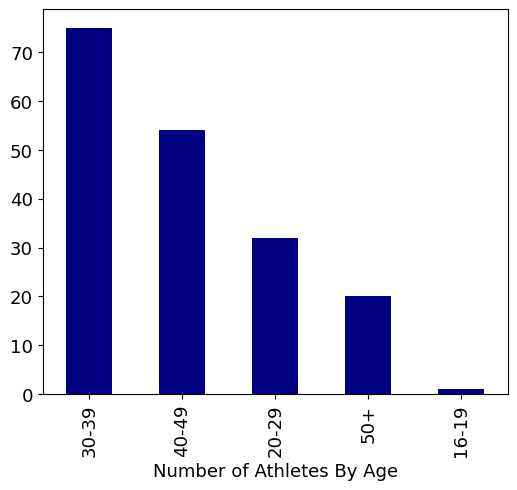

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
age_counts = df["AgeCategory"].value_counts()

ax = age_counts.plot(kind="bar", fontsize=13, color="navy", figsize=(6,5))
plt.xlabel("Number of Athletes By Age", fontsize=13)

Text(0.5, 0, 'Number of Athletes by Province')

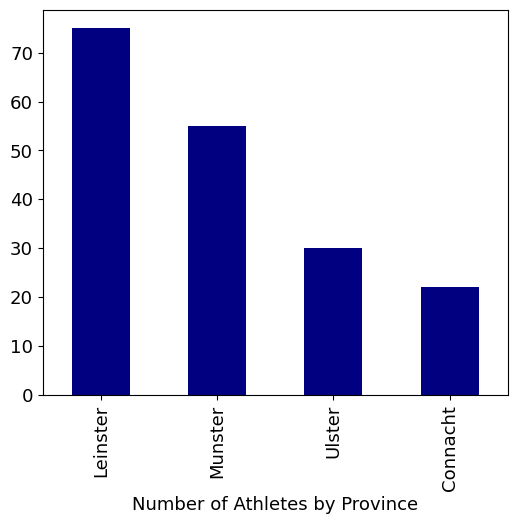

In [12]:
province_counts = df["Province"].value_counts()

ax = province_counts.plot(kind="bar", fontsize=13, color="navy", figsize=(6,5))
plt.xlabel("Number of Athletes by Province", fontsize=13)

Produce a visualisation of the distribution of finish times:

Text(0.5, 0, 'Finish Time(seconds')

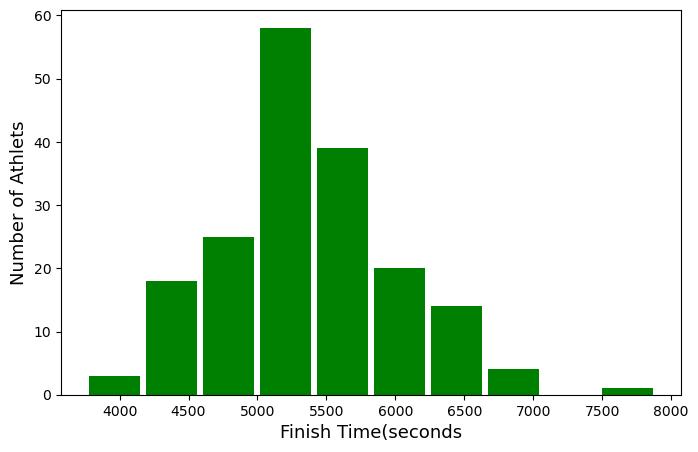

In [13]:
ax = df["Finish"].hist(bins=10, figsize=(8,5), color='green', grid=False, rwidth=0.9)
plt.ylabel("Number of Athletes", fontsize=13)
plt.xlabel("Finish Time(seconds", fontsize=13)

Repeat the above, but this time produce a visualisation of the distribution of finish times for female athletes only:

Text(0.5, 0, 'Finish Time(seconds')

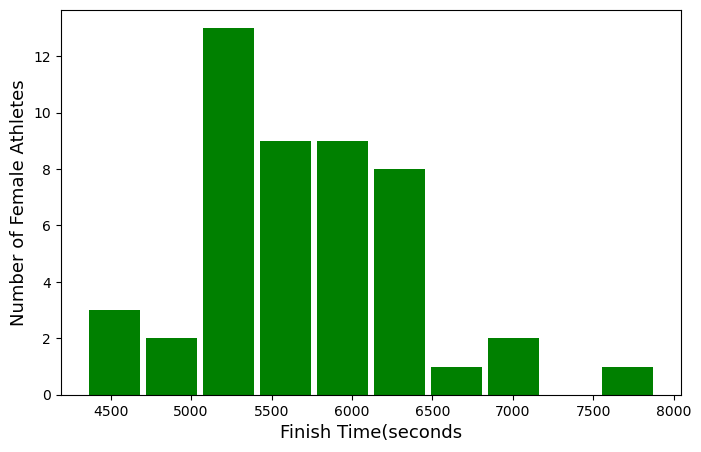

In [15]:
df_female = df[df["Gender"] == "F"]

ax = df_female["Finish"].hist(bins=10, figsize=(8,5), color='green', grid=False, rwidth=0.9)
plt.ylabel("Number of Female Athletes", fontsize=13)
plt.xlabel("Finish Time(seconds", fontsize=13)

Produce three plots which show: 
1. The relationship between the time taken for the swimming and cycling segments.
2. The relationship between the time taken for the swimming and running segments.
3. The relationship between the time taken for the cycling and running segments.

Text(0, 0.5, 'Cycling Segment (seconds)')

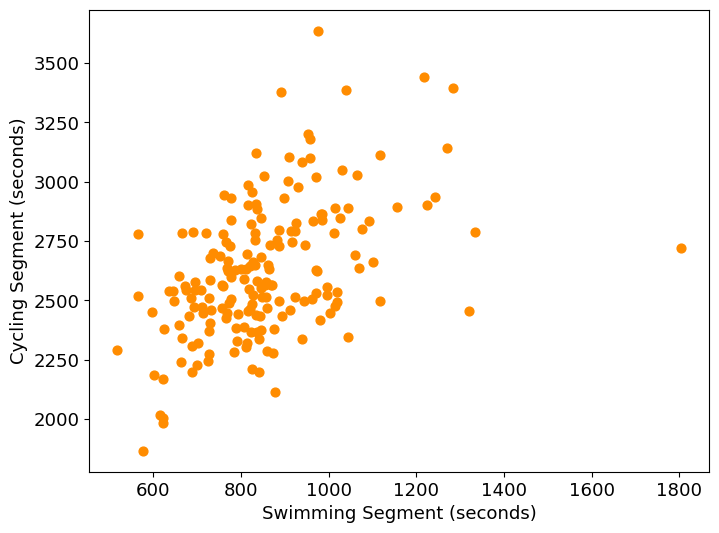

In [18]:
# Scatter Plot SWIMMING & CYCLING

ax = df.plot(kind='scatter', figsize=(8,6), color='darkorange', s=40, fontsize=13, x="Swim", y="Cycle")
plt.xlabel("Swimming Segment (seconds)", fontsize=13)
plt.ylabel("Cycling Segment (seconds)", fontsize=13)

Text(0, 0.5, 'Running Segment (seconds)')

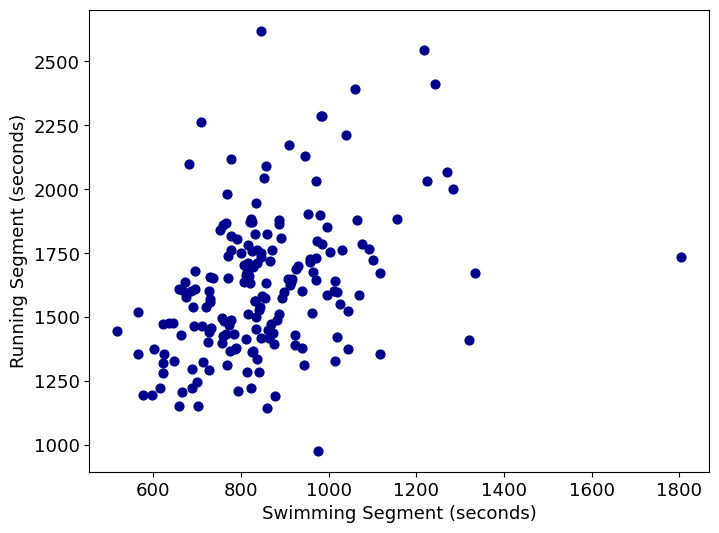

In [20]:
# Scatter Plot SWIMMING & RUNNING
ax = df.plot(kind='scatter', figsize=(8,6), color='darkblue', s=40, fontsize=13, x="Swim", y="Run")

plt.xlabel("Swimming Segment (seconds)", fontsize=13)
plt.ylabel("Running Segment (seconds)", fontsize=13)



Text(0, 0.5, 'Running Segment (seconds)')

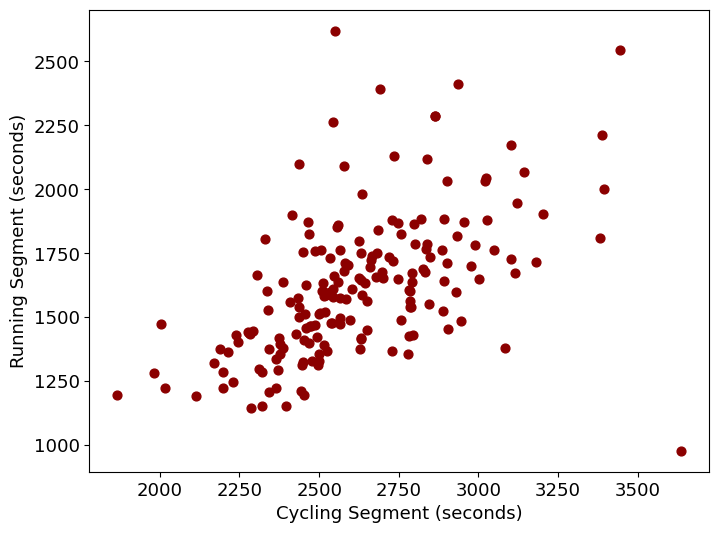

In [21]:
  # Scatter Plot CYCLING & RUNNING
ax = df.plot(kind='scatter', figsize=(8,6), color='darkred', s=40, fontsize=13, x="Cycle", y="Run")
plt.xlabel("Cycling Segment (seconds)", fontsize=13)
plt.ylabel("Running Segment (seconds)", fontsize=13)